# 3. 신경망
퍼셉트론은 결국 가중치를 사람이 적절하게 수동으로 결정해야 한다. 신경망은 이 한계를 극복하게 도와준다. 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 주요 성질인 것.

## 3-1. 신경망의 구조와 퍼셉트론 복습
신경망은 입력층/은닉층/출력층으로 나누어진다. 예를 들어 은닉층이 1층으로만 이루어져 있다면 총 3개의 계층이 있는 것이다. 하지만 결국 가중치를 가진 것은 2개 층밖에 없으므로, 필자가 공부한 책에서는 2층 신경망이라고 부르고 있다.

퍼셉트론은 아래와 같은 식으로 구성되어 가중치와 입력을 곱하여 더한 값이 임계치를 넘으면 1을 출력하고, 그렇지 않으면 0을 출력하였다.
$$w_1 x_1 +  w_2 x_2 + b > 0  (단, b는 편향)$$

이 식의 좌변은 x에 대한 함수이므로, 다음과 같이 나타낼 수 있다.
$$h(x) = w_1 x_1 + w_2 x_2 + b$$

따라서, $$h(x) = \begin{cases} 1 (x > 0) \\0(x \le 0)\end{cases}$$

이 때 $h(x)$를 활성화 함수라고 한다. 활성화 함수는 입력 신호의 총합을 출력 신호로 변환하는 함수이다. 즉, 이 입력 신호의 총합이 output을 활성화할지 말지에 대한 기술한 식이다. 퍼셉트론에서는 이 활성화 함수가 $x>0$일때만 1을 출력하므로 step function임을 알 수 있다.

## 3-2. 활성화 함수 (Sigmoid function와 ReLU function)

앞서 살펴보았듯 활성화 함수는 퍼셉트론의 출력을 입력 변수로 받아 값을 뉴런 밖으로 출력하는 역할을 한다. 퍼셉트론에서는 활성화 함수로 step function을 사용하지만, 신경망에서는 시그모이드(sigmoid) 함수 등 다양한 함수를 사용한다.

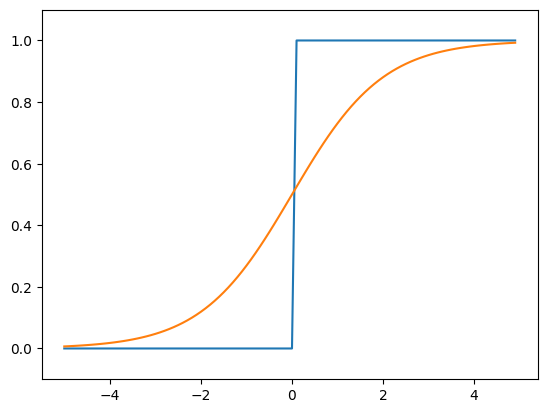

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x) : # np.array를 받는다.
    y = x > 0 # y는 각 x에 대해 조건문을 만족하면 True, 그렇지 않으면 False를 반환할 것이다.
    return y.astype(int) # astype 함수에 의해 np.int 타입으로 반환하므로 x > 0 인 경우만 1, 그렇지 않으면 0인 배열을 반환하는 함수가 된다.

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

def sigmoid_function(x : float) :
    return 1/(1+np.exp(-x))

y2 = sigmoid_function(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()


시그모이드 함수와 스텝 함수의 공통점은 바로 비선형 함수라는 것이다. 신경망에서는 비선형 함수를 사용해야 하는데, 그 이유는 선형 함수를 사용했을 때 신경망의 층을 깊게 하는 의미가 없어지기 때문이다. 아래와 같이 활성화 함수가 선형식이라고 해보자.

$$h(x) = cx$$

다층 신경망에서는 활성화 함수의 출력이 곧 다음 신경망의 입력이 되므로, 다층 신경망의 결과는 곧 아래와 같이 선형 함수의 합성함수가 될 것이다.

$$h(h(h(x))) = c c c x = c^3x$$

이는 다층 신경망을 아무리 거쳐도 동일한 선형 함수밖에 되지 못함을 뜻한다. 따라서 선형 함수를 활성화 함수로 사용하여 다층 신경망을 구성하는 것은 그다지 의미가 없다.

한편, 최근에는 ReLU(Rectified Linear Unit) 함수가 주로 이용되는데, 그 함수는 다음과 같다.

$$h(x) = \begin{cases} x (x > 0) \\0(x \le 0)\end{cases}$$

그래프로 나타내면 다음과 같다.

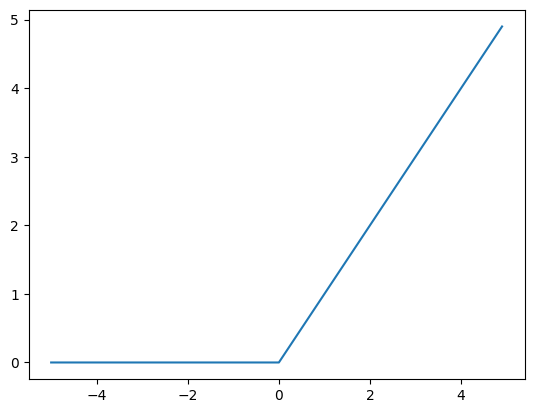

In [6]:
def relu_function(x) :
    return np.maximum(x, 0)

y3 = relu_function(x)
plt.plot(x, y3)
plt.show()

## 3-3. 행렬 곱을 이용한 신경망의 구현

신경망을 구현하기 위해 알아야 할 사항은 다음과 같다.

1. 신경망의 한개 층에서, 입력과 출력이 각각 weight의 행/열이 된다. 즉, 입력이 2개이고 출력이 3개라면 행렬 W의 shape는 (2, 3)이 되어야 한다.
2. 가중치, 편향, 뉴런을 표기하는 방법은
$$w_{21}^{(1)}$$

와 같이 작성하며, 오른쪽 아래 '21'의 의미는 1층에서 2층으로 가는 weight이라는 뜻이다. 또 오른쪽 위의 (1)은 1층의 가중치라는 의미이다. 이를 바탕으로 3층 신경망의 예시를 구현하여 보면 아래와 같다.

In [7]:
def init_network() :
    network = {}
    network['W1'] = np.array([[0.1, 0.2, 0.3], [0.4, 0.2, 0.1]])
    network['b1'] = np.array([0.1, 0.2, 0.3]) # 편향은 입력이 1개이고, 1층의 뉴런이 3개이므로 1x3 행렬이어야 한다.
    network['W2'] = np.array([[0.1, 0.2], [0.3, 0.2], [0.4, 0.2]])
    network['b2'] = np.array([0.3, 0.2])
    network['W3'] = np.array([[0.3, 0.2], [0.1, 0.2]])
    network['b3'] = np.array([0.2, 0.1])
    
    return network

def forward(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = relu_function(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = relu_function(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = relu_function(a3)
    
    return y

y = forward(init_network(), np.array([1, 0.7]))
print(y)

[0.4872 0.3632]


위의 코드는 입력층, 2개의 은닉층, 출력층으로 이루어져 있으며, 각 층별로 2개/3개/2개/2개의 뉴런으로 구성되어 있다.

## 3-4. 출력층의 설계

### 3-4-1. 항등 함수와 소프트맥스 함수

기계학습 문제는 분류와 회귀로 나뉘는데, 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 출력층의 활성화 함수로 사용한다. 항등함수는 입력을 그대로 출력하는 함수이다.

한편, 소프트맥스 함수는 다음과 같은 수식으로 주어진다.

$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)}$$

즉, 소프트맥스 함수는 항등 함수와 달리 그 전 층의 모든 입력값에 영향을 받는다. 소프트맥스 함수를 구현하면 다음과 같다.

In [17]:
# 오버플로우
def softmax_function(x) :
    exp_x = np.exp(x)
    return np.exp(x)/np.sum(exp_x)

y1 = softmax_function(np.array([1010, 1000, 990]))
print(y1)
print(np.sum(y1))

[nan nan nan]
nan


C:\Users\sangg\AppData\Local\Temp\ipykernel_33476\1312499309.py:2: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
C:\Users\sangg\AppData\Local\Temp\ipykernel_33476\1312499309.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/np.sum(exp_x)
C:\Users\sangg\AppData\Local\Temp\ipykernel_33476\1312499309.py:3: RuntimeWarning: invalid value encountered in divide
  return np.exp(x)/np.sum(exp_x)


이렇듯, 지수함수를 사용하면 오버플로우가 일어나 계산하기 어려울 수 있다. 따라서 분모/분자에 상수를 곱하여 수식을 변경하면,

$$y_k = \frac{\exp(a_k)}{\sum_{i=1}^{n}\exp(a_i)} = \frac{C \exp(a_k)}{\sum_{i=1}^{n}C \exp(a_i)} = \frac{\exp(a_k + \ln C)}{\sum_{i=1}^{n}\exp(a_i + \ln C)}$$

$$= \frac{\exp(a_k + C')}{\sum_{i=1}^{n}\exp(a_i + C')}$$

이 때, $C' = - max(a)$ 를 대입하여 뉴런의 최대값을 빼주면, 분모/분자가 최소화되어 오버플로우를 막을 수 있으면서도 동일한 결과값을 얻을 수 있다. 구체적으로는 아래와 같다.

In [25]:
def softmax_function_rev(x) :
    max_x = np.max(x)
    exp_x = np.exp(x - max_x)
    return np.exp(x - max_x)/np.sum(exp_x)

y2 = softmax_function_rev(np.array([0.3, 2.9, 4.0]))
print(y2)

print(np.sum(y2)) # y2의 각 요소는 [0, 1]의 실수이고, 총합은 1이다.

[0.01821127 0.24519181 0.73659691]
1.0


위 함수를 통해서, y2의 각 요소는 0과 1 사이의 값이고 그 총합은 1.0이 됨을 알 수 있었다. 즉, 출력 y는 확률인 것이다. 소프트맥스 함수를 통한 classification은 결국 대상이 어떤 class인지 분류하게 되는데, y[2]의 값이 가장 높으므로 3번째 class일 확률이 높다고 추론하는 것. 다만 자연대수는 단조증가하므로, 소프트맥스를 거친다고 해서 입력값 a의 요소들 간 대소관계가 변하지는 않는다. 따라서 신경망으로 분류할 때는 출력층의 소프트맥스를 생략하는 경우도 많다.

한편, 분류에서 뉴련의 출력층의 뉴런 수를 정할 때는 일반적으로 분류하고픈 클래스의 수로 설정한다. 즉, 이미지를 바탕으로 0~9의 숫자를 구분하고 싶다면 출력 층의 뉴런 수는 10개가 되어야한다.